In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Datasets\AV_Projects\Big_Mart\train_bm.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
def var(x):
    v = x.fillna(x.mean(), inplace = True)
    return v

In [9]:
var(train['Item_Weight'])

In [11]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [15]:
def var(x):
    v = x.fillna('Medium', inplace = True)
    return v

In [16]:
var(train['Outlet_Size'])

In [17]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

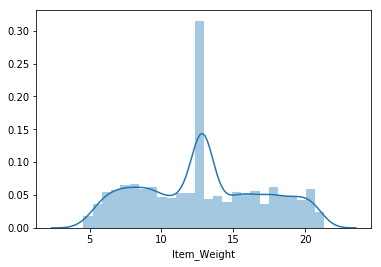

In [18]:
sns.distplot(train['Item_Weight'])
#plotting histogram to see the distribution of the item_weight

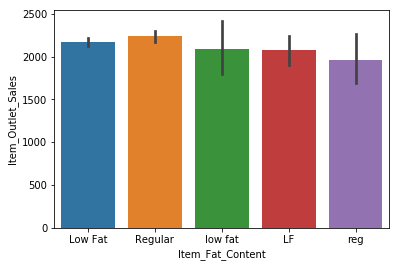

In [22]:
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train)
#from the below graph regular fat has highest item_outlet_sales

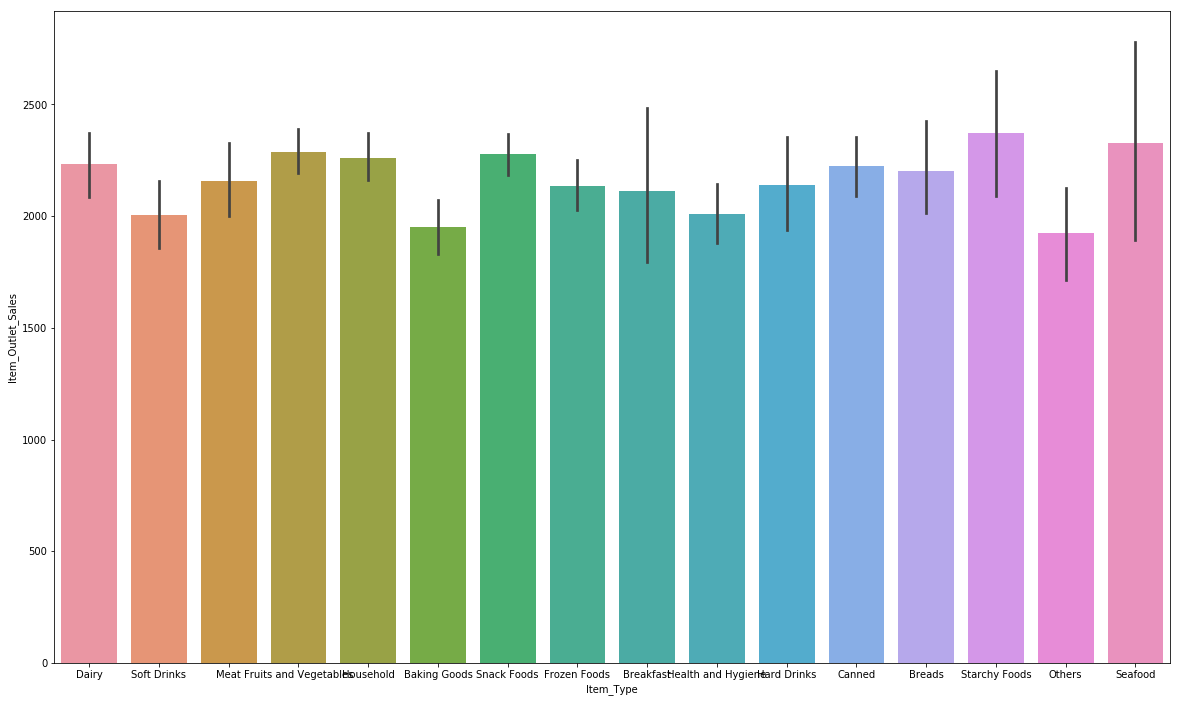

In [38]:
plt.figure(figsize=(20,12))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
#starchy foods has highest number of outlet sales

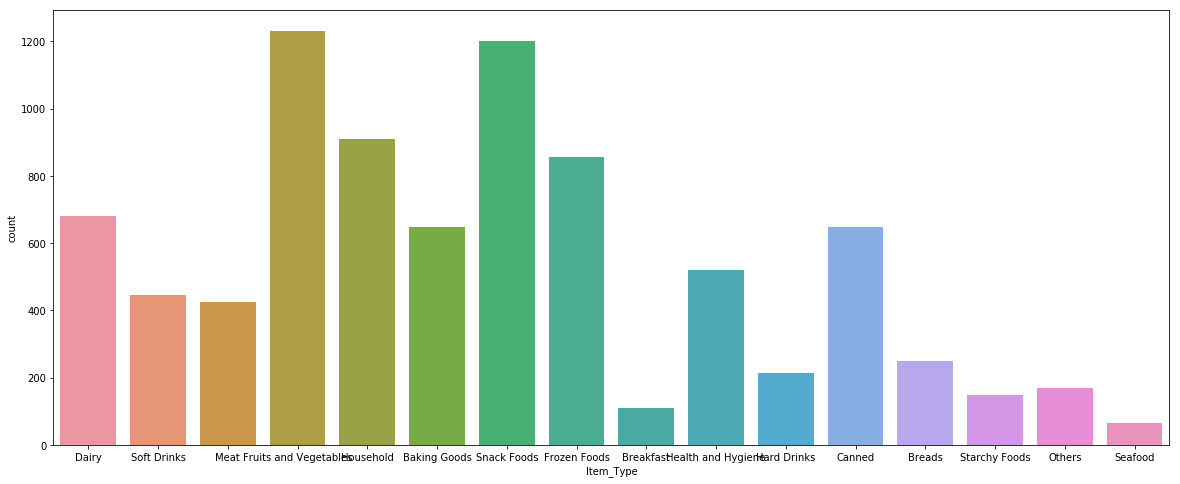

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(data=train, x = 'Item_Type')
#fruits and vegetables are sold more in quantity

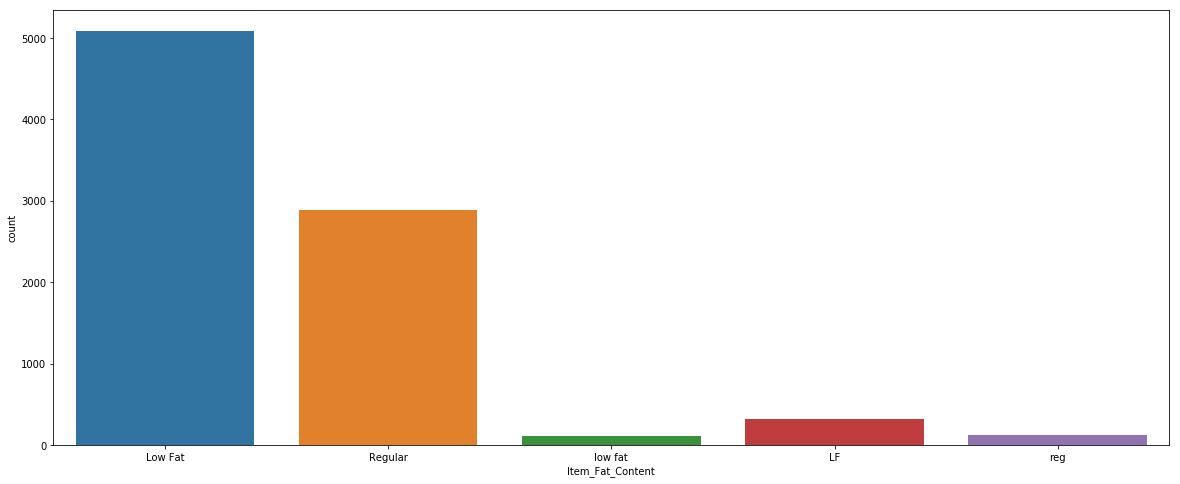

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(data=train, x = 'Item_Fat_Content')
#lowfat items are sold more in quantity

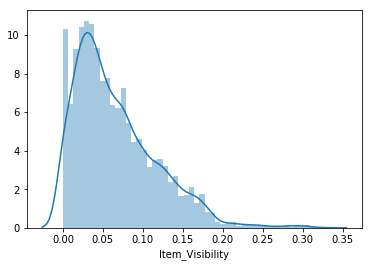

In [32]:
sns.distplot(train['Item_Visibility'])
#plotting histogram to see the item_visibility 

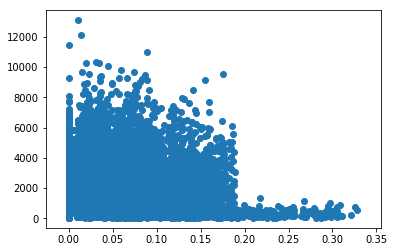

In [33]:
plt.scatter( x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = train)
#lesser the size of item visibility greater the item outlet sales.

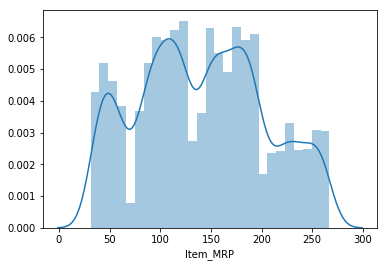

In [34]:
sns.distplot(train['Item_MRP'])
#distribution plot to see the mrp of the item

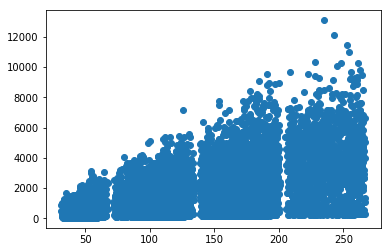

In [36]:
plt.scatter( x = 'Item_MRP', y = 'Item_Outlet_Sales', data = train)
#greater the mrp price of the item graeter is the item outlet sales

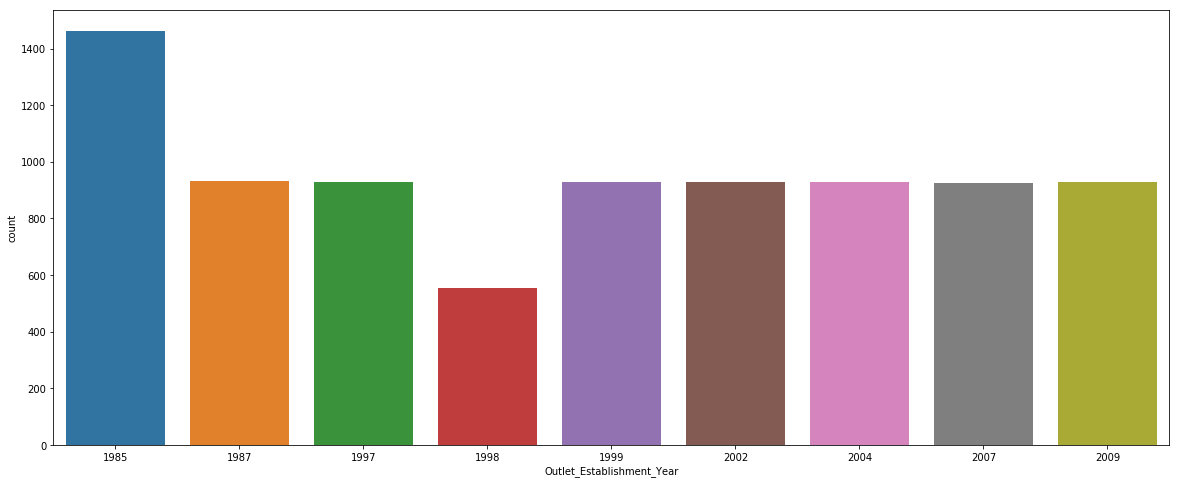

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(data=train, x = 'Outlet_Establishment_Year')
#In the year 1985 more no of outlets have been established

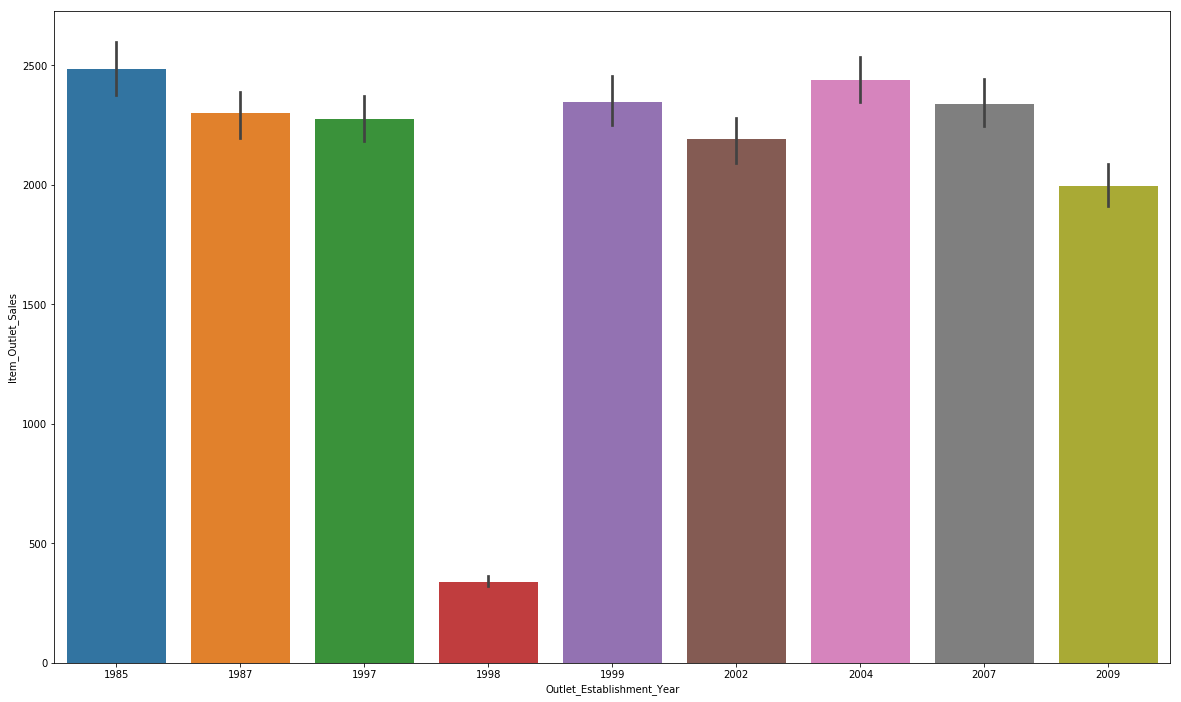

In [39]:
plt.figure(figsize=(20,12))
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)
#In the year 2004 max no of outlet sales. 

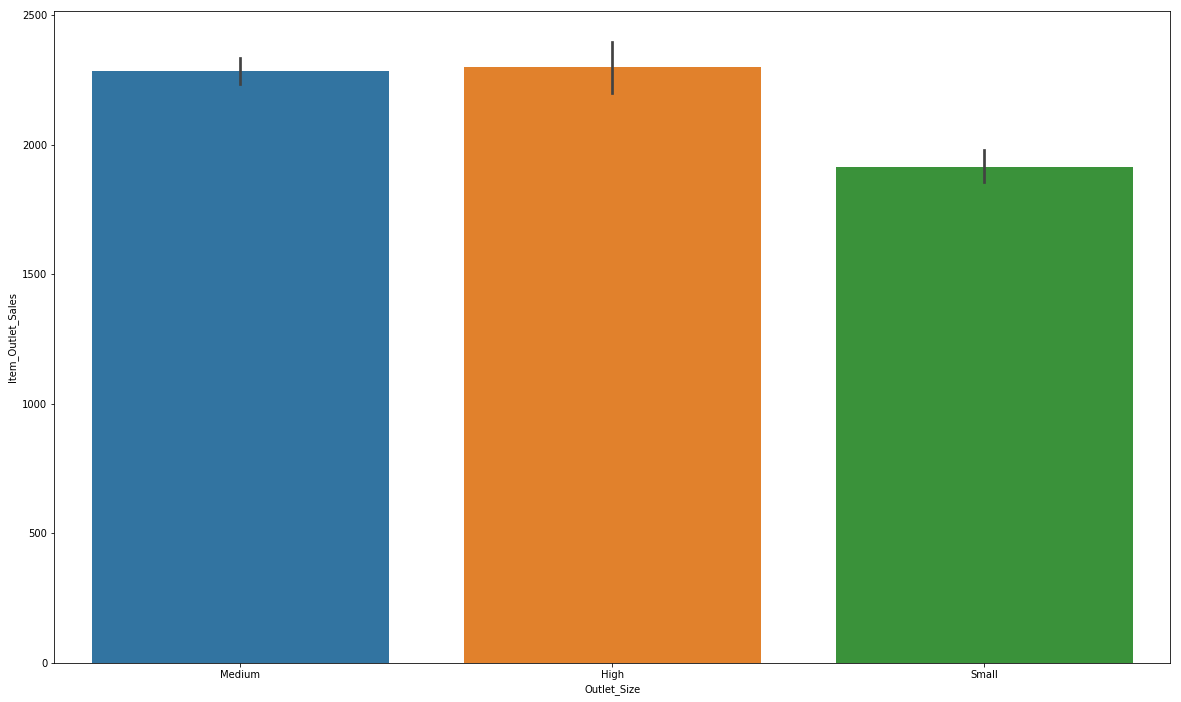

In [40]:
plt.figure(figsize=(20,12))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)
#bigger the size of outlet greater the sales

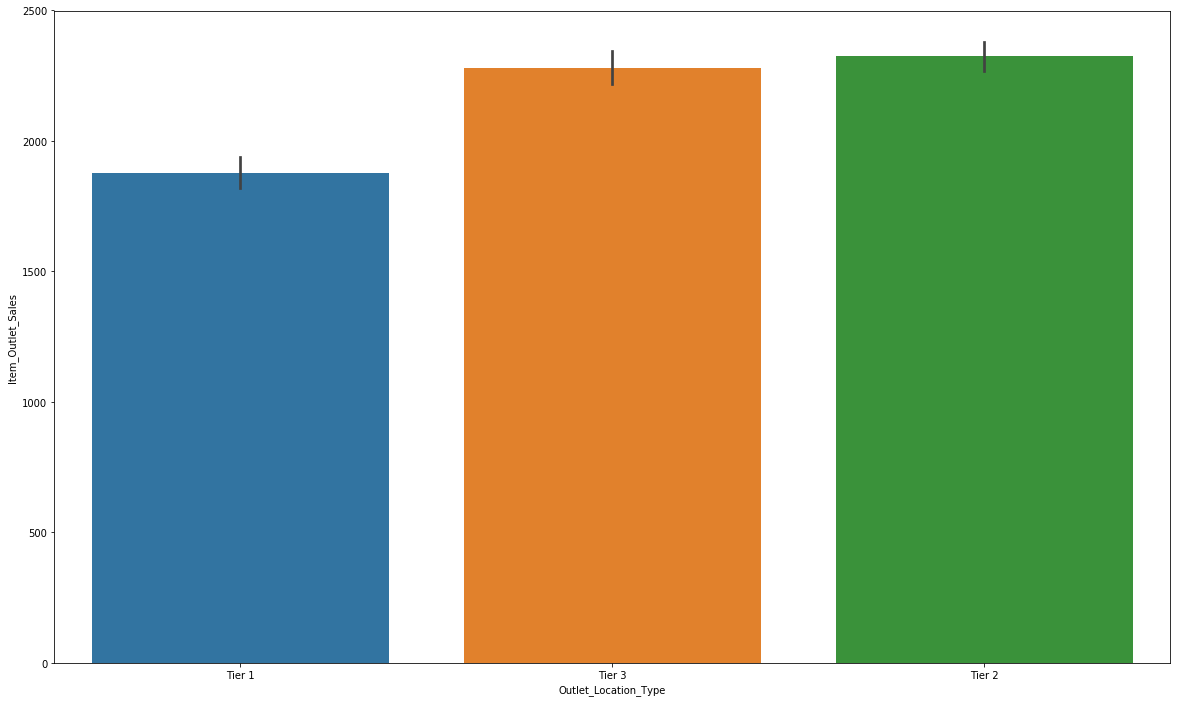

In [41]:
plt.figure(figsize=(20,12))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)
#Tier2 has higher no of outlet sales

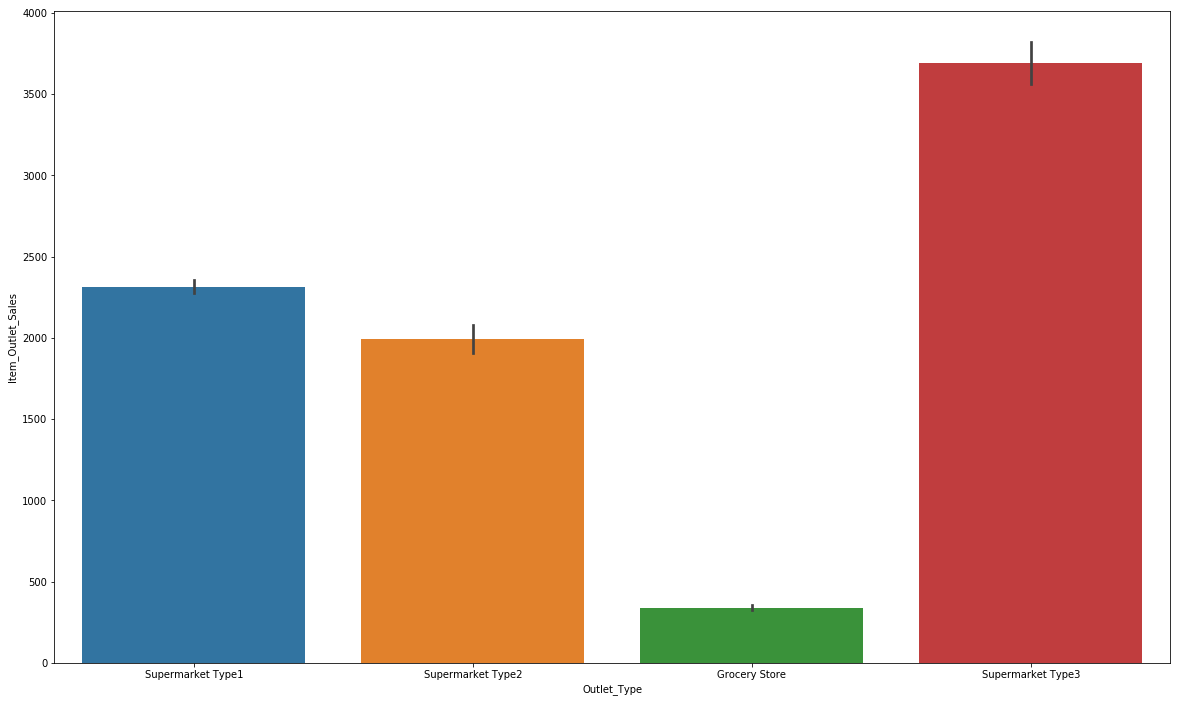

In [44]:
plt.figure(figsize=(20,12))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)
#supermarket type3 has greater sales and grocery store has lesser sales.

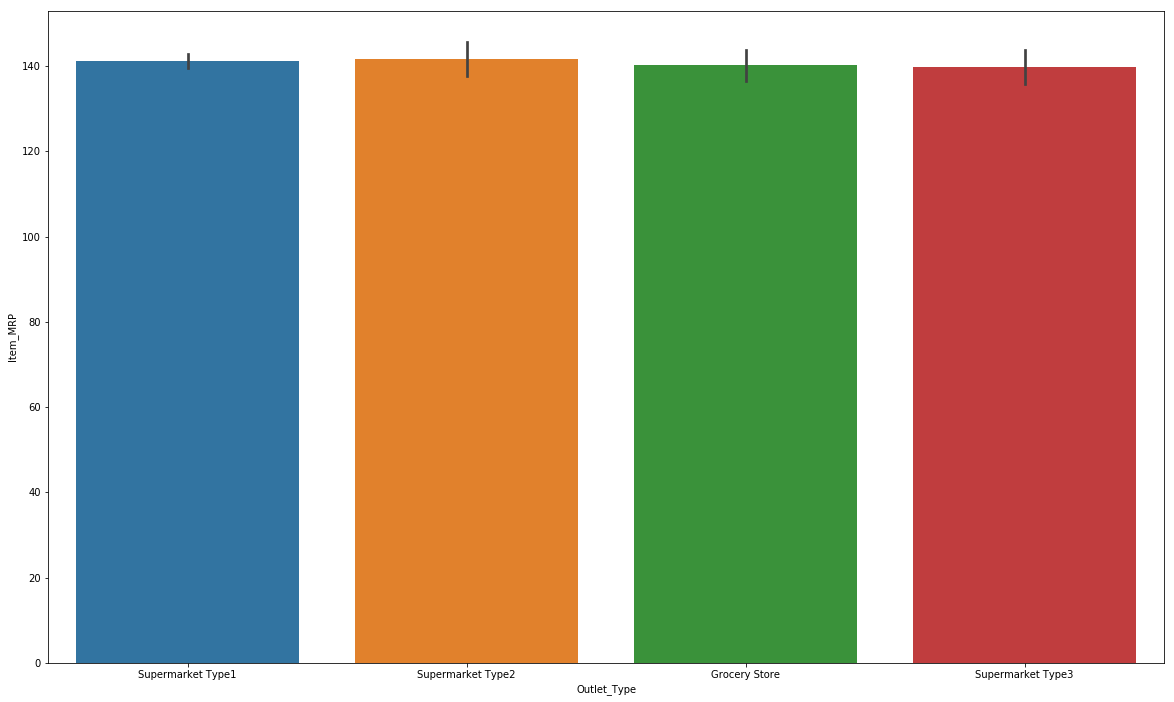

In [45]:
plt.figure(figsize=(20,12))
sns.barplot(x='Outlet_Type', y='Item_MRP', data=train)

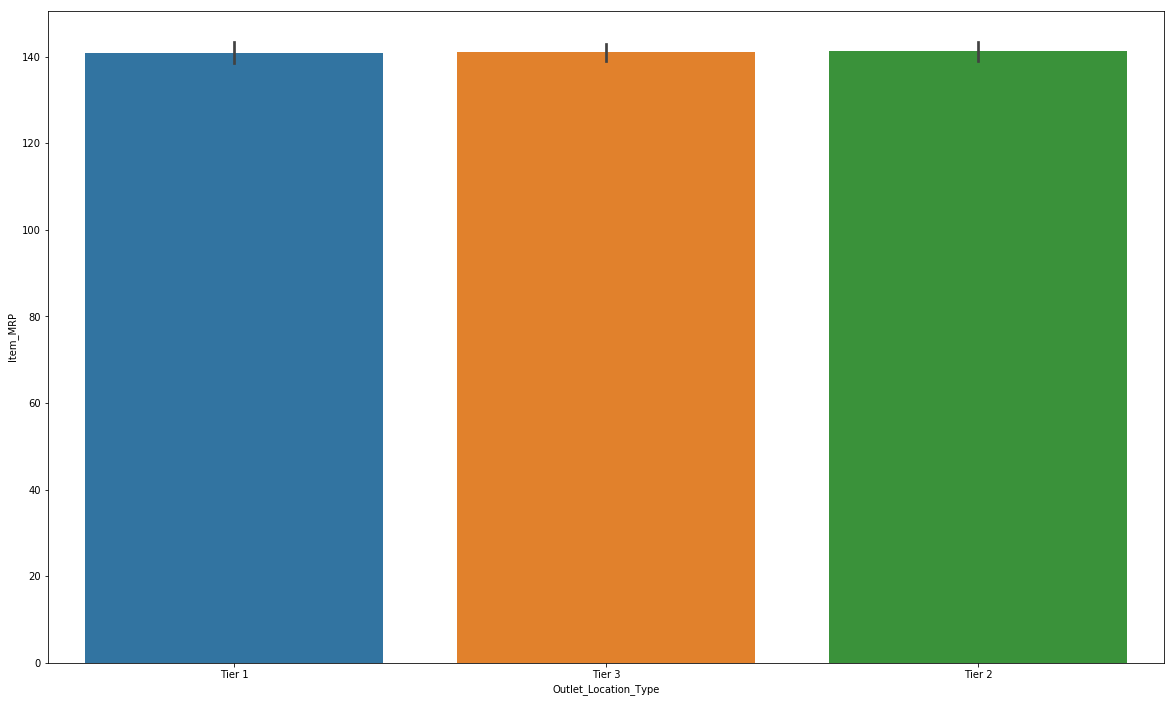

In [46]:
plt.figure(figsize=(20,12))
sns.barplot(x='Outlet_Location_Type', y='Item_MRP', data=train)

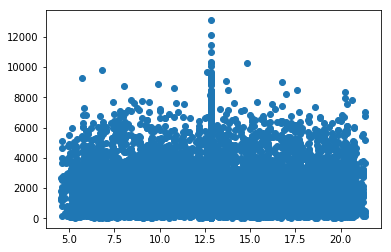

In [47]:
plt.scatter( x = 'Item_Weight', y = 'Item_Outlet_Sales', data = train)

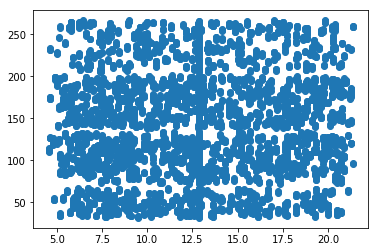

In [48]:
plt.scatter( x = 'Item_Weight', y = 'Item_MRP', data = train)

In [49]:
#applying machine learning algorithm to see the mean square error
#lesser the mean square error better is our algorithm performance
from sklearn.model_selection import train_test_split

In [50]:
x = train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'], axis = 1)

In [51]:
y = train[['Item_Outlet_Sales']]

In [52]:
x = pd.get_dummies(x)

In [53]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [54]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm = LinearRegression()

In [58]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
lm.coef_

array([[ 8.32040760e-01, -1.51025976e+02,  1.58415385e+01,
         3.09372837e+01, -1.17110216e+02,  1.72588219e+01,
         1.49488490e+01,  1.56663366e+02, -7.17608205e+01,
        -7.24074853e+00, -1.61517298e+01, -2.31252431e+01,
         2.24548075e+01, -5.02153875e+01,  1.43348697e+01,
         2.44229605e+01, -6.74415900e+01,  3.00531071e+01,
        -4.33970601e+01,  6.44858626e+01, -1.09455521e+02,
         1.73400142e+02,  4.69841774e+00, -6.94420610e+01,
         5.26191740e+01,  4.29969032e+02, -2.66779376e+02,
        -1.63189656e+02,  1.67830582e+02, -1.92788842e+01,
        -1.48551698e+02, -1.67994474e+03, -6.03193814e+01,
        -3.70488233e+02,  2.11075236e+03]])

In [60]:
lm.intercept_

array([-61620.50367925])

In [61]:
predictions = lm.predict(x_test)

In [62]:
predictions

array([[ 4054.32779369],
       [ 1162.18640151],
       [ 2104.72262661],
       ...,
       [ 1050.0701119 ],
       [  -56.78000009],
       [-1090.64295302]])

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predictions))

In [64]:
rms
#root mean square is very less compared to sales of the item

1136.0991485180582